In [1]:
import numpy as np
import pandas as pd
# from word2number import w2n
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import chi2_contingency, ttest_ind
import datetime


In [3]:
df = pd.read_csv('../csv-archivos/limpieza_final.csv',index_col=0)

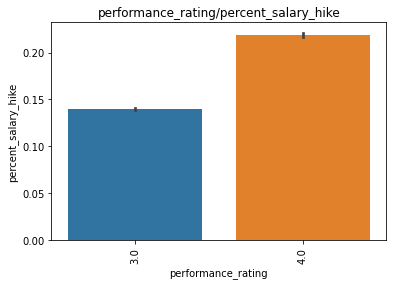

In [113]:
sns.barplot(x='performance_rating', y='percent_salary_hike', data=df)
plt.xticks(rotation = 90)
plt.title("performance_rating/percent_salary_hike");

Los empleados con una calificación de 3 tienen incrementos salariales que generalmente son menores al 15%, mientras que los empleados con una calificación de 4 pueden recibir aumentos salariales que llegan hasta el 25%. Esta disparidad en los incrementos salariales podría ser un factor que contribuye a que algunos empleados decidan abandonar la empresa. De hecho, el 73% de los empleados que abandonaron la empresa tenían una calificación de 3.

In [116]:
df5 = df[df['total_working_years'].notnull() & df['percent_salary_hike'].notnull()]

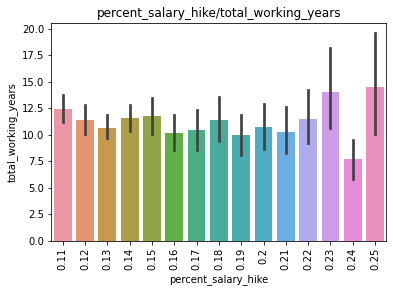

In [121]:
sns.barplot(x='percent_salary_hike', y='total_working_years', data=df)
plt.xticks(rotation = 90)
plt.title("percent_salary_hike/total_working_years");

Observamos incrementos salariales que varían  un rango del 10% al 25%, . La gráfica presenta intervalos de confianza amplios, lo que sugiere una variabilidad significativa en los aumentos salariales. Además, es evidente que existen empleados con un número similar de años en la compañía que reciben incrementos salariales diferentes, lo que sugiere que otros factores, como el desempeño laboral o la negociación salarial, pueden estar influyendo en estas diferencias.

image.png

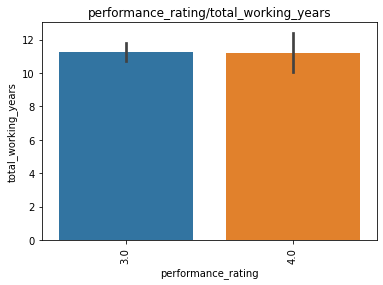

In [122]:
sns.barplot(x='performance_rating', y='total_working_years', data=df)
plt.xticks(rotation = 90)
plt.title("performance_rating/total_working_years");

En la gráfica anterior, hemos observado que los empleados de categoría 4 recibían aumentos de salario más altos que los empleados de categoría 3. En esta grafica ambos grupos de empleados muestran un número de años en la empresa similar. Sin embargo, es notable que para el grupo de empleados de categoría 4, el intervalo de confianza es significativamente más amplio.Esta diferencia en la variabilidad de los años trabajados sugiere que, aunque ambos grupos tienen una antigüedad laboral comparable, existe una mayor diversidad en la experiencia laboral en esta empresa de los empleados de categoría 4. 

In [ ]:
No existe una diferencia si

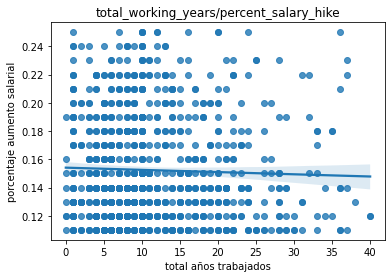

In [149]:
# Es una gráfica que se utiliza para trazar un gráfico de dispersión (*scatter plot*) junto con una línea de regresión lineal que se ajusta a los datos. Esta línea de regresión lineal muestra la tendencia general de la relación entre dos variables y puede ayudar a identificar patrones o tendencias en los datos. 
# visualizamoms la relacion entre las columnas distance y points_accumulated. Analizamos para el df de inicio
sns.regplot(x = 'total_working_years', 
y = 'percent_salary_hike', 
data = df)
plt.xlabel('total años trabajados')
plt.ylabel('porcentaje aumento salarial')
plt.title("total_working_years/percent_salary_hike");

La interpretación de la gráfica de dispersión muestra que no hay una relación directa entre el aumento salarial y el número de años trabajados en la compañía. La forma casi horizontal de la distribución de puntos sugiere que, en general, el aumento salarial no aumenta consistentemente con la antigüedad en la empresa. 

In [110]:
df4 = df[df['education'].notnull() & df['percent_salary_hike'].notnull()]


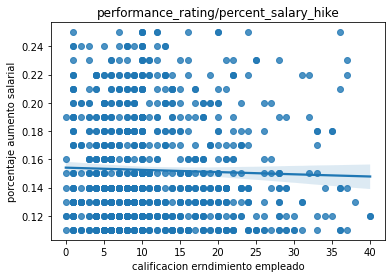

In [111]:
sns.regplot(x = 'total_working_years', 
y = 'percent_salary_hike', 
data = df4)
plt.xlabel('calificacion erndimiento empleado')
plt.ylabel('porcentaje aumento salarial')
plt.title("performance_rating/percent_salary_hike");

In [ ]:
df_correlaciones = df.corr()
df_correlaciones2 = df_correlaciones[df_correlaciones < 0]

df_correlaciones2

In [ ]:
# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))

# convertimos nuestra matriz de correlación a una gráfica
sns.heatmap(df_correlaciones2, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "mako", # para establecer el color de la gráfica
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1); # para identificar el valor mínimo de nuestra escala de colores

# ab tesstingEstudios de salario y variables personales

Comparamos monthlyincome los ingresos mensuales del empleado con education que es el nivel de educacion del empleado, creamos dos grupos, el grupo nº 1 contiene los niveles 1,2,3 y el grupo nº2 los niveles 4,5. Planteariamos las siguientes hipotesis:

Hipótesis nula (H0): No hay diferencia significativa en los ingresos mensuales entre los dos grupos de educación.
Hipótesis alternativa (H1): Hay una diferencia significativa en los ingresos mensuales entre los dos grupos de educación.

In [167]:
df1 = df.dropna(subset=['monthly_income'])

In [168]:
grupo_1 = df1[df1['education'].isin([1, 2])]
grupo_1['education'].value_counts()


2    137
1     83
Name: education, dtype: int64

In [169]:
grupo_2 = df1[df1['education'].isin([3,4, 5])]
grupo_2['education'].value_counts()

3    294
4    213
5     27
Name: education, dtype: int64

In [170]:
# calculamos el valor de las medias para cada grupo
g1_mean =grupo_1['monthly_income'].mean()
g2_mean = grupo_2['monthly_income'].mean()

print(f"Media de salario educion grupo 1: {g1_mean}")
print(f"Media de salario educacion grupo 2: {g2_mean}")

Media de salario educion grupo 1: 6309.0
Media de salario educacion grupo 2: 6512.048689138577


In [171]:
# creamos una nueva columna "control" y le asignamos el valor con el cual vamos a comparar
grupo_1["control"] = "secondary_college"
grupo_2["control"] = "advanced_education"

In [172]:
#unimos los grupos creados
df_control = pd.concat([grupo_1, grupo_2], ignore_index=True)
df_control.shape

(754, 34)

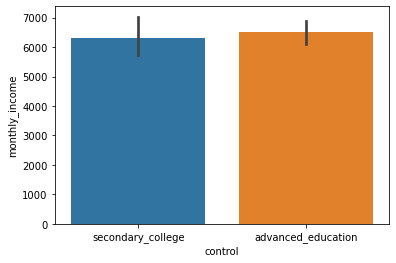

In [173]:
#graficamos para visualizar el comportamiento de cada categoria
sns.barplot(data = df_control, y = "monthly_income", x = "control");

In [174]:

_, p_valor_grupo_1 = stats.shapiro(df_control['monthly_income'])
p_valor_grupo_1


1.598348520146411e-28

No es homogeneo 

In [175]:
# Realizar la prueba de Mann-Whitney U
resultado_prueba = stats.mannwhitneyu(grupo_1['monthly_income'], grupo_2['monthly_income'])

# Imprimir los resultados de la prueba U de Mann-Whitney
print("Resultado de la prueba U de Mann-Whitney:")
print("Estadística U:", resultado_prueba.statistic)
print("Valor p:", resultado_prueba.pvalue)


Resultado de la prueba U de Mann-Whitney:
Estadística U: 54621.0
Valor p: 0.12980603612796057


Concluimos que si hay diferencia en los salarios de acuerdo al nivel de educación.

Comparamos monthlyincome los ingresos mensuales del empleado con la edad del empleado, creamos dos grupos, el grupo nº 3 contiene nacidos hasta el año 1990 y el grupo nº4 los nacidos despues de 1990. Planteariamos las siguientes hipotesis:

Hipótesis nula (H0): No hay diferencia significativa en los ingresos mensuales entre los dos grupos de edades.
Hipótesis alternativa (H1): Hay una diferencia significativa en los ingresos mensuales entre los dos grupos de edades.

In [176]:
df["date_birth"].value_counts()

1988    82
1992    81
1989    81
1994    76
1987    73
1991    65
1993    64
1985    61
1990    61
1983    60
1986    53
1996    53
1995    52
1981    49
1978    46
1997    44
1984    44
1982    43
1980    38
1977    37
1979    34
1973    31
1999    27
1998    27
1976    27
1974    25
1968    24
1969    20
1972    20
1971    19
1970    19
1975    19
1967    17
2001    16
2000    15
2002    15
1965    14
2003    11
1964    10
2004     9
2005     8
1963     5
1966     5
Name: date_birth, dtype: int64

In [184]:

# Calcular la fecha de corte para dividir los grupos en mayores y menores de 45
fecha_corte = 1984

# Dividir el DataFrame en dos grupos según la fecha de nacimiento
grupo_3 = df1[df['date_birth'] <= fecha_corte]
grupo_4 = df1[df['date_birth'] > fecha_corte]

# Verificar el tamaño de cada grupo
print("Cantidad de observaciones en el Grupo 1:", len(grupo_1))
print("Cantidad de observaciones en el Grupo 2:", len(grupo_2))


Cantidad de observaciones en el Grupo 1: 220
Cantidad de observaciones en el Grupo 2: 534


In [185]:
# calculamos el valor de las medias para cada grupo
g3_mean =grupo_3['monthly_income'].mean()
g4_mean = grupo_4['monthly_income'].mean()

print(f"Media de salario edad grupo 3: {g3_mean}")
print(f"Media de salario edad grupo 4: {g4_mean}")

Media de salario edad grupo 3: 9344.037414965986
Media de salario edad grupo 4: 4604.928260869565


In [186]:
# creamos una nueva columna "control" y le asignamos el valor con el cual vamos a comparar
grupo_3["control"] = "menor=40"
grupo_4["control"] = "mayor40"

In [187]:
#unimos los grupos creados
df_control1 = pd.concat([grupo_3, grupo_4], ignore_index=True)
df_control1.shape

(754, 34)

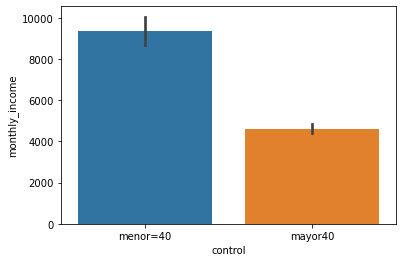

In [188]:
#graficamos para visualizar el comportamiento de cada categoria
sns.barplot(data = df_control1, y = "monthly_income", x = "control");

In [189]:
_, p_valor_grupo_3 = stats.shapiro(df_control1['monthly_income'])
p_valor_grupo_1

1.598348520146411e-28

In [190]:
# Realizar la prueba de Mann-Whitney U
resultado_prueba = stats.mannwhitneyu(grupo_3['monthly_income'], grupo_4['monthly_income'])

# Imprimir los resultados de la prueba U de Mann-Whitney
print("Resultado de la prueba U de Mann-Whitney:")
print("Estadística U:", resultado_prueba.statistic)
print("Valor p:", resultado_prueba.pvalue)

Resultado de la prueba U de Mann-Whitney:
Estadística U: 100964.0
Valor p: 2.934429381453523e-30


Concluimos que si hay diferencias en el salario de acuerdo a la edad  entre los rangos menor igual que 40 y mayor que 40 años

In [25]:
df["attrition"].value_counts() 

False    1325
True      255
Name: attrition, dtype: int64

In [ ]:
noactivo = df[df['attrition'] == True ]
noactivo

In [45]:
noactivo["attrition"].value_counts()

True    255
Name: attrition, dtype: int64

Revisamos los trabajadores que se han ido y que el porcentaje de subida de sueldo es menor que 20%

In [60]:
# Contar el número total de filas donde attrition es True
numero_total_attrition_true = df[df['attrition'] == True].shape[0]

# Filtrar el DataFrame por las condiciones dadas
filtro = (df['attrition'] == True) & (df['percent_salary_hike'] < 0.20)

# Contar el número de filas donde attrition es True y percent_salary_hike es menor que el 20%
numero_filas_filtradas = df[filtro].shape[0]

# Calcular el porcentaje
porcentaje = (numero_filas_filtradas / numero_total_attrition_true) * 100

print("Número total de casos donde attrition es True:", numero_total_attrition_true)
print("Número de casos donde attrition es True y percent_salary_hike es menor que el 20%:", numero_filas_filtradas)
print("Porcentaje de casos donde attrition es True y percent_salary_hike es menor que el 20%:", porcentaje, "%")


Número total de casos donde attrition es True: 255
Número de casos donde attrition es True y percent_salary_hike es menor que el 20%: 216
Porcentaje de casos donde attrition es True y percent_salary_hike es menor que el 20%: 84.70588235294117 %


In [93]:
filtro1 = df['percent_salary_hike'] < 0.20
numero_registros = df[filtro1].shape[0]

print("Número de registros que cumplen con el filtro:", numero_registros)


Número de registros que cumplen con el filtro: 1343


In [89]:
# Aplicar el filtro al DataFrame df
filtro = df[(df['attrition'] == True) & (df['gender'] == "m") & (df['job_level'] == 1)]

# Calcular el número de registros que cumplen con el filtro
numero_registros = filtro.shape[0]

print("Número de registros que cumplen con el requisito:", numero_registros)


Número de registros que cumplen con el requisito: 93


In [90]:
# Aplicar el filtro al DataFrame df
filtro = df[(df['attrition'] == True) & (df['gender'] == "f") & (df['job_level'] == 1)]

# Calcular el número de registros que cumplen con el filtro
numero_registros = filtro.shape[0]

print("Número de registros que cumplen con el requisito:", numero_registros)

Número de registros que cumplen con el requisito: 58


numero de personas que se han ido de la empresa con educacion 3 y 4

In [86]:
filtro = df[(df['attrition'] == True) & (df['education'].isin([3, 4]))]
filtro["education"].count()

170

calculamos los niveles de educacion 3 y 4 que se han ido de la empresa y que ademas son hombres

In [74]:

# Contar el número total de filas donde attrition es True
numero_total_attrition_true = df[df['attrition'] == True].shape[0]

filtro_educacion_genero = (noactivo['education'].isin([3, 4])) & (noactivo['gender'] == 'm')

# Filtrar el DataFrame por las condiciones dadas
filtro = (df['attrition'] == True) & (df['education'].isin([3, 4])) & (df['gender'] == 'm')

# Contar el número de filas donde attrition es True y percent_salary_hike es menor que el 20%
numero_filas_filtradas = df[filtro].shape[0]

# Calcular el porcentaje
porcentaje = (numero_filas_filtradas / numero_total_attrition_true) * 100

print("Número total de casos donde attrition es True:", numero_total_attrition_true)
print("Número de casos donde attrition es True y educacion 34 y hombres:", numero_filas_filtradas)
print("Porcentaje de casos donde attrition es True y percent_educacion 34 hombres:", porcentaje, "%")



Número total de casos donde attrition es True: 255
Número de casos donde attrition es True y educacion 34 y hombres: 112
Porcentaje de casos donde attrition es True y percent_educacion 34 hombres: 43.92156862745098 %


In [71]:
# Filtrar el DataFrame por el nivel de educación igual a 3 o 4
filtro_educacion = noactivo['education'].isin([3, 4])
df_filtrado = noactivo[filtro_educacion]


In [72]:
df_correlaciones3 = df_filtrado.corr()


In [ ]:
# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))

# convertimos nuestra matriz de correlación a una gráfica
sns.heatmap(df_correlaciones3, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "mako", # para establecer el color de la gráfica
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1); # para identificar el valor mínimo de nuestra escala de colores

In [56]:
# Inicializar un diccionario para almacenar los resultados
resultados = {}

# Iterar sobre las columnas del DataFrame
for columna in noactivo.columns:
    # Contar los valores únicos en la columna actual, excluyendo los valores nulos
    conteo_valores = noactivo[columna].value_counts(dropna=False)
    # Guardar los resultados en el diccionario
    resultados[columna] = conteo_valores

# Imprimir los resultados
for columna, conteo_valores in resultados.items():
    print(f"--- {columna} ---")
    print(conteo_valores)
    print()


--- attrition ---
True    255
Name: attrition, dtype: int64

--- business_travel ---
NaN           126
rarely         84
frequently     36
no              9
Name: business_travel, dtype: int64

--- daily_rate ---
NaN       22
303.0      3
1362.0     3
318.0      3
1475.0     2
          ..
699.0      1
1434.0     1
542.0      1
1150.0     1
638.0      1
Name: daily_rate, Length: 202, dtype: int64

--- department ---
NaN                       208
research & development     28
sales                      16
human resources             3
Name: department, dtype: int64

--- distance_from_home ---
2     28
1     25
9     19
3     15
10    14
5     10
24    10
7     10
16     9
4      9
8      8
13     8
25     7
22     7
6      7
17     6
12     6
14     6
15     6
23     5
18     4
27     4
19     4
29     4
20     3
21     3
26     3
11     3
45     2
42     2
32     1
40     1
38     1
35     1
31     1
28     1
36     1
37     1
Name: distance_from_home, dtype: int64

--- education ---
3

In [146]:
#agrupamos por el tipo de tarjeta y luego contamos las que hay en cada categoria
df_proporcion = df.groupby('attrition')["education"].count().reset_index()

In [ ]:
# Inicializar un diccionario para almacenar los resultados
resultados = {}

# Iterar sobre cada columna del DataFrame
for columna in noactivo.columns:
    # Hacer un groupby por 'attrition' y contar el número de veces que 'attrition' es verdadero ('Yes')
    conteo_attrition = df.groupby('attrition')[columna].apply(lambda x: (x == True).sum())
    # Guardar el resultado con el nombre de la columna
    resultados[columna] = conteo_attrition

# Convertir el diccionario de resultados en un DataFrame
df_resultados = pd.DataFrame.from_dict(resultados, orient='columns')

# Ordenar el DataFrame por la columna 'Yes' en orden descendente
df_resultados = df_resultados.sort_values(by='Yes', ascending=False)

# Imprimir los resultados
print(df_resultados)


In [50]:


noactivo1= noactivo.groupby("attrition")['business_travel'].count()
noactivo1
 

attrition
True    129
Name: business_travel, dtype: int64

In [ ]:
df_correlaciones = noactivo.corr()
df_correlaciones2 = df_correlaciones[df_correlaciones < 0]

df_correlaciones2

In [ ]:
# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))

# convertimos nuestra matriz de correlación a una gráfica
sns.heatmap(df_correlaciones2, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "mako", # para establecer el color de la gráfica
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1); # para identificar el valor mínimo de nuestra escala de colores

In [37]:
# Contar los valores únicos en la columna 'attrition'
attrition_counts = df['attrition'].value_counts()

# Mostrar el resultado
print(attrition_counts)


False    1325
True      255
Name: attrition, dtype: int64


In [32]:
# Agrupar por la variable "attrition" y contar el número de ocurrencias para cada valor de "years_in_current_role"
df_year_in_current_role_attrition = df.groupby("attrition")['years_in_current_role'].count()

# Mostrar el resultado
print(df_year_in_current_role_attrition)


attrition
False    27
True      5
Name: years_in_current_role, dtype: int64


In [34]:
df_education_attrition = df.groupby("attrition")['education'].count()
df_education_attrition 

attrition
False    1325
True      255
Name: education, dtype: int64

In [38]:
df["education"].value_counts()

3    607
4    434
2    308
1    178
5     53
Name: education, dtype: int64

In [ ]:
df.columns

In [39]:
# Agrupar por la variable "attrition" y contar el número de ocurrencias de cada valor único de "education" dentro de cada grupo
df_education_attrition = df.groupby("attrition")['education'].value_counts()

# Mostrar el resultado
print(df_education_attrition)


attrition  education
False      3            502
           4            369
           2            261
           1            145
           5             48
True       3            105
           4             65
           2             47
           1             33
           5              5
Name: education, dtype: int64


In [ ]:
df_education_attrition = df.groupby("attrition")['education'].count()

# Otros analisis a desarrollar

3. Analizamos el porcentaje de aumento salarial : hay una variedad de incrementos salariales entre los empleados, con un promedio de alrededor del 15.17% y una desviación estándar moderada de aproximadamente 3.65%.
Valores mínimos y máximos (Min y Max): El porcentaje mínimo de aumento salarial registrado es del 11%, mientras que el máximo es del 25%.
El 25% de los empleados tienen un aumento salarial del 12% o menos, el 50% tienen un aumento del 14% o menos, y el 75% tienen un aumento del 18% o menos.

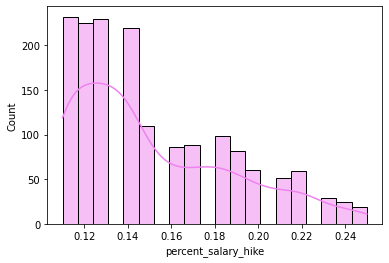

In [241]:
# Distribución de acuerdo a porcentaje de aumento salarial
sns.histplot(x = "percent_salary_hike", 
             data =df, 
             color = "violet", 
             kde = True,
             bins = 20 );



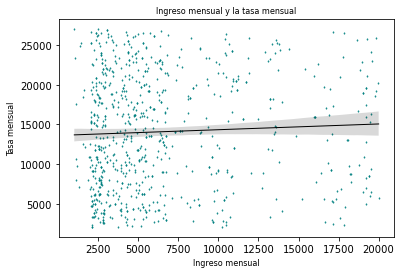

In [208]:
4. # Relación entre el ingreso mensual y la tasa mensual, es casi horizontal asi que no hay una relación directa solo que al aumentar el ingreso tambien la tasa
sns.regplot(x = "monthly_income", 
            y = "monthly_rate", 
            data = df, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1} # cambiamos el color y el tamaño de los puntos del scaterplot
            )

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("Ingreso mensual", fontsize = 8)
plt.ylabel("Tasa mensual", fontsize = 8)

# ponemos título a la gráfica
plt.title("Ingreso mensual y la tasa mensual", fontsize = 8);

In [ ]:
# Seguimos buscando relación entre estas variables 
datos_sueldo1["ratio"] = datos_sueldo1["monthly_income"] / datos_sueldo1["monthly_rate"]

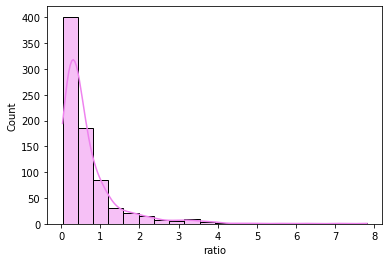

In [249]:
# Distribución de acuerdo "monthly_income"/'monthly_rate'
sns.histplot(x = "ratio", 
             data =datos_sueldo1, 
             color = "violet", 
             kde = True,
             bins = 20 );

(0.0, 2.0)

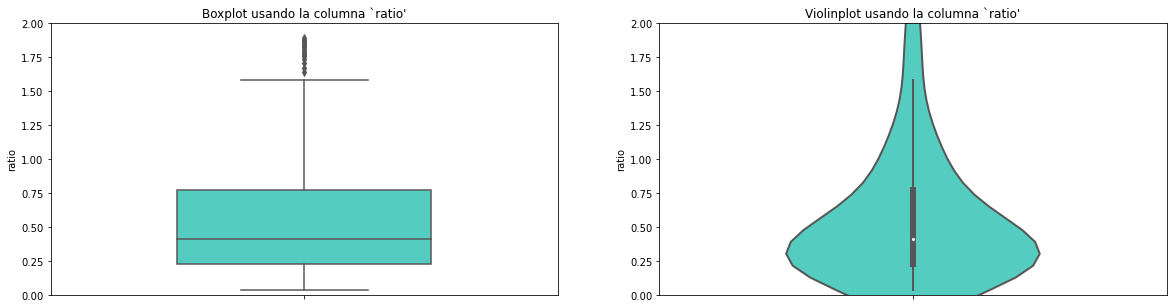

In [255]:
# empezamos creando el subplot con el número de gráficas deseadas en su interior
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# añadimos un boxplot usando el método 'sns.boxplot()'
sns.boxplot(y = "ratio", 
            data = datos_sueldo1, 
            width = 0.5, 
            color = "turquoise", 
            ax = axes[0])

# añadimos un título a esta primera gráfica usando el método '.set_title()
axes[0].set_title("Boxplot usando la columna `ratio'")


# CREAMOS EL VIOLINPLOT USANDO SEABORN
# añadimos un violinplot usando el método 'sns.violinplot()'. COMO ES SEABORN, USAMOS EL PARÁMETRO 'ax' PARA INDICAR EN QUE EJE DE LA FIGURA LO QUEREMOS 
sns.violinplot(y = "ratio", 
               data = datos_sueldo1, 
               width = 0.5, 
               color = "turquoise", 
               linewidth = 2, 
               ax = axes[1])

# añadimos un título a esta primera gráfica usando el método '.set_title()
axes[1].set_title("Violinplot usando la columna `ratio'")


# como ya sabemos que tenemos muchos outliers, vamos a usar el método '.set_ylim()' para "eliminar" los valores atípicos de la visualización
axes[0].set_ylim([0,2])
axes[1].set_ylim([0,2])

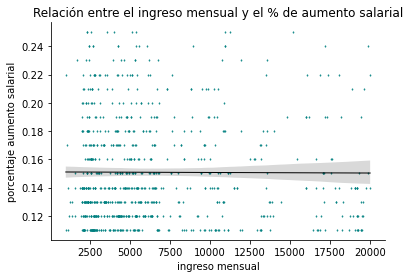

In [256]:
# No existe relacion considerable entre el ingreso mensual  y el % de aumento salarial
sns.regplot(x = "monthly_income", 
            y = "percent_salary_hike", 
            data = df, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1} # cambiamos el color y el tamaño de los puntos del scaterplot
            )

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("ingreso mensual")
plt.ylabel("porcentaje aumento salarial")

# ponemos título a la gráfica
plt.title("Relación entre el ingreso mensual y el % de aumento salarial")

# quitamos la linea de arriba y de la derecha
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

"daily_rate",
    "hourly_rate",
    "same_as_monthly_income",
    "salary",
    "percent_salary_hike",
    "monthly_income",
    "monthly_rate"

In [ ]:
# Seguimos buscando relación entre estas variables, consideramos que se trabajan 40 horas a la semana 20 dias al mes y que la tasa mensual se suma al salario final

datos_sueldo1["salario_mes_daily_rate"] = (datos_sueldo1["daily_rate"]*20 + datos_sueldo1["monthly_rate"])
datos_sueldo1

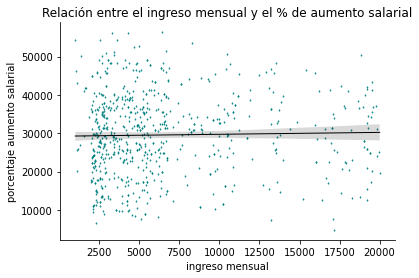

In [292]:
# No existe relacion considerable entre el ingreso mensual  y el % de aumento salarial parece que no tienen gran relación
sns.regplot(x = "monthly_income", 
            y = "salario_mes_daily_rate", 
            data = datos_sueldo1, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1} # cambiamos el color y el tamaño de los puntos del scaterplot
            )

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("ingreso mensual")
plt.ylabel("porcentaje aumento salarial")

# ponemos título a la gráfica
plt.title("Relación entre el ingreso mensual y el % de aumento salarial")

# quitamos la linea de arriba y de la derecha
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

In [298]:
datos_sueldo1["salario_mes_daily_rate%"] =100*((datos_sueldo1["daily_rate"]*20 + datos_sueldo1["monthly_rate"])-datos_sueldo1["monthly_income"])/datos_sueldo1["monthly_income"]
datos_sueldo1["salario_mes_daily_rate%"]

/tmp/ipykernel_8178/3164288646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_sueldo1["salario_mes_daily_rate%"] =100*((datos_sueldo1["daily_rate"]*20 + datos_sueldo1["monthly_rate"])-datos_sueldo1["monthly_income"])/datos_sueldo1["monthly_income"]


0         3.096688
1        -1.705085
2       -19.025582
3        97.349875
4              NaN
           ...    
1609     56.106538
1610    782.909827
1611           NaN
1612           NaN
1613    227.597971
Name: salario_mes_daily_rate%, Length: 1614, dtype: float64

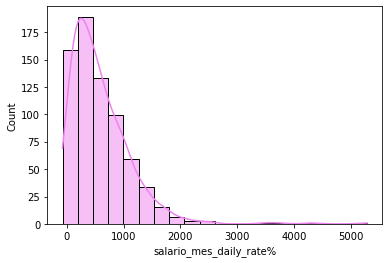

In [299]:
# Distribución de acuerdo a salario mensual
sns.histplot(x = "salario_mes_daily_rate%", 
             data =datos_sueldo1, 
             color = "violet", 
             kde = True,
             bins = 20 );